# hOLA

In [23]:
import numpy as np
#Función grad_conjugado
#Dada una tolerancia dada, x_0, A\in R^{nxn} definida positiva y b\in R^n.
def grad_conj(A, b, x0, tol):
    #Definimos r_0 <- Ax_0-b, p_0 <- -r_0 y k <- 0
    r0 = A @ x0 - b
    p0 = -r0
    k = 0
    #Aquí podemos hacer que nuesta k sea menor a un 
    #número de iteraciones máximo, pero mejor comparamos
    #el valor del residuo con el valor de la tolerancia
    #para decidir si seguir o no,es decir, si el valor
    #del residuo es suficientemente pequeño y la solución
    #se acerca cada vez más a la solución exacta.
    #Gracias a esto, después no necesitaremos el condicional
    #r_1 distinto de 0, ya que es implícito en el while
    while np.linalg.norm(r0) > tol:
        #Definimos el tamaño de paso
        # \alpha <- \frac{r_k^T * r_k}{p_k^T * A * p_k}
        alpha = r0.T @ r0 / (p0.T @ A @ p0)
        #Actualizamos nuestro vector de solución moviéndolo 
        #en alpha pasos hacia la direción p_0
        #x_1 <- x_0 + \alpha * p_0
        x1 = x0 + alpha * p0
        #Calculamos r_1 <- r_0 + \alpha * A * p_0
        r1 = r0 + alpha * A @ p0
        #Calculamos el factor para actualizar la dirección de búsqueda
        #Para asegurar que las direcciones de búsqueda
        #Sean A-conjugadas
        #\beta = frac{r_1^T*r_1}{r_0^T * r_0}
        beta = r1.T @ r1 / (r0.T @ r0)
        #calculamos la nueva dirección de búsqueda p_1
        #p_1 <- -r_1 + \beta * p_0
        p1 = -r1 + beta * p0

        #Sumamos 1 a la cantidad de iteraciones y re definimos x_0, p_0
        #r_0 para la siguiente iteración
        k += 1
        x0 = x1
        r0 = r1
        p0 = p1

    #Al terminar regresamos la solución x_0 y el número de iteraciones.
    return x0, k

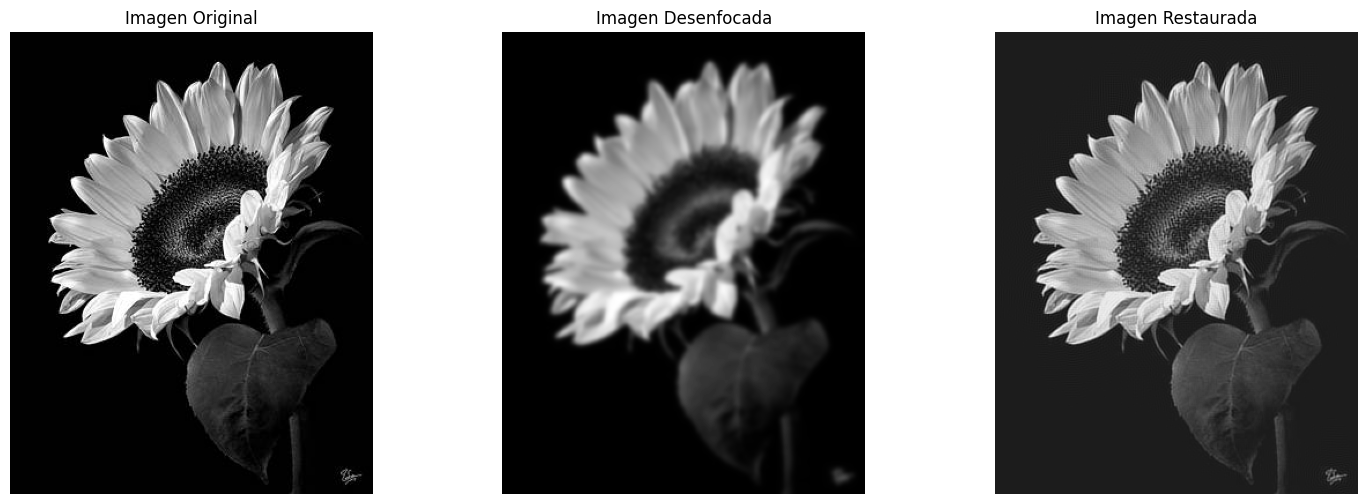

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Función para aplicar desenfoque gaussiano
def aplicar_desenfoque_gaussiano(imagen, sigma=2):
    return gaussian_filter(imagen, sigma=sigma)

# Método del gradiente conjugado
def grad_conj(A_func, b, x0, tol, max_iter=1000):
    r = b - A_func(x0)
    p = r.copy()
    rsold = np.inner(r, r)
    x = x0.copy()

    for i in range(max_iter):
        Ap = A_func(p)
        alpha = rsold / np.inner(p, Ap)
        x += alpha * p
        r -= alpha * Ap
        rsnew = np.inner(r, r)
        
        if np.sqrt(rsnew) < tol:
            break
        
        p = r + (rsnew/rsold) * p
        rsold = rsnew
    
    return x

# Función que simula la acción de la matriz A, para el método del gradiente conjugado
def A_func(x):
    # Simula la operación Ax sin construir la matriz A
    return aplicar_desenfoque_gaussiano(x.reshape(imagen_gris.shape), sigma).flatten()

# Cargar y procesar la imagen
imagen = plt.imread('image1.jpg')  # Reemplaza con la ruta de tu imagen
imagen_gris = np.mean(imagen, axis=2)  # Convertir a escala de grises
sigma = 2  # Define el nivel de desenfoque
imagen_desenfocada = aplicar_desenfoque_gaussiano(imagen_gris, sigma)

# Preparar los datos para el método del gradiente conjugado
b = imagen_desenfocada.flatten()
x0 = np.zeros_like(b)  # Inicialización
tol = 1e-6  # Tolerancia

# Ejecutar el método del gradiente conjugado
solucion = grad_conj(A_func, b, x0, tol)

# Reconstruir la imagen a partir de la solución
imagen_restaurada = solucion.reshape(imagen_gris.shape)

# Mostrar imágenes
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_desenfocada, cmap='gray')
plt.title('Imagen Desenfocada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_restaurada, cmap='gray')
plt.title('Imagen Restaurada')
plt.axis('off')

plt.show()


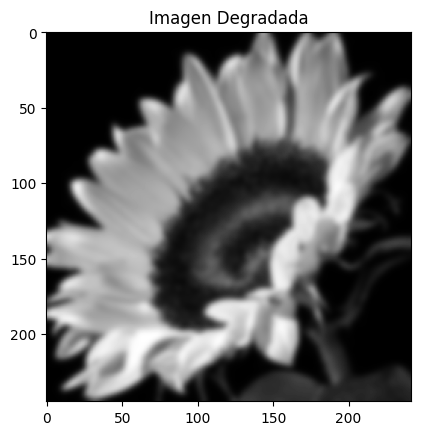

TypeError: grad_conj() takes 4 positional arguments but 5 were given

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Función que aplica el desenfoque gaussiano
def aplicar_desenfoque_gaussiano(imagen, sigma):
    return gaussian_filter(imagen, sigma=sigma)

# Operador lineal que simula la multiplicación por A
def operador_A(x, sigma, shape):
    imagen = x.reshape(shape)
    imagen_desenfocada = aplicar_desenfoque_gaussiano(imagen, sigma)
    return imagen_desenfocada.flatten()

# Operador lineal que simula la multiplicación por la transpuesta de A (A^T)
# En este caso simplificado, A es simétrica, por lo que A y A^T son iguales
def operador_AT(x, sigma, shape):
    return operador_A(x, sigma, shape)

# Cargar y preparar la imagen
imagen = plt.imread('img1.jpg')
imagen_gris = np.mean(imagen, axis=2)  # Convertir a escala de grises

# Definir el sigma para el desenfoque gaussiano
sigma = 2

# Aplicar desenfoque gaussiano para obtener la imagen "degradada"
imagen_degradada = aplicar_desenfoque_gaussiano(imagen_gris, sigma)

# Mostrar la imagen degradada
plt.imshow(imagen_degradada, cmap='gray')
plt.title('Imagen Degradada')
plt.show()

# Inicializar x0 para el gradiente conjugado
x0 = np.zeros_like(imagen_degradada.flatten())
b = imagen_degradada.flatten()
tol = 1e-3  # Definir una tolerancia

# Aplicar el gradiente conjugado
solucion, iteraciones = grad_conj(
    lambda x: operador_A(x, sigma, imagen_gris.shape),
    lambda x: operador_AT(x, sigma, imagen_gris.shape),
    b,
    x0,
    tol
)

# Reconstruir la imagen a partir de la solución
imagen_restaurada = solucion.reshape(imagen_gris.shape)

# Mostrar la imagen restaurada
plt.imshow(imagen_restaurada, cmap='gray')
plt.title('Imagen Restaurada')
plt.show()


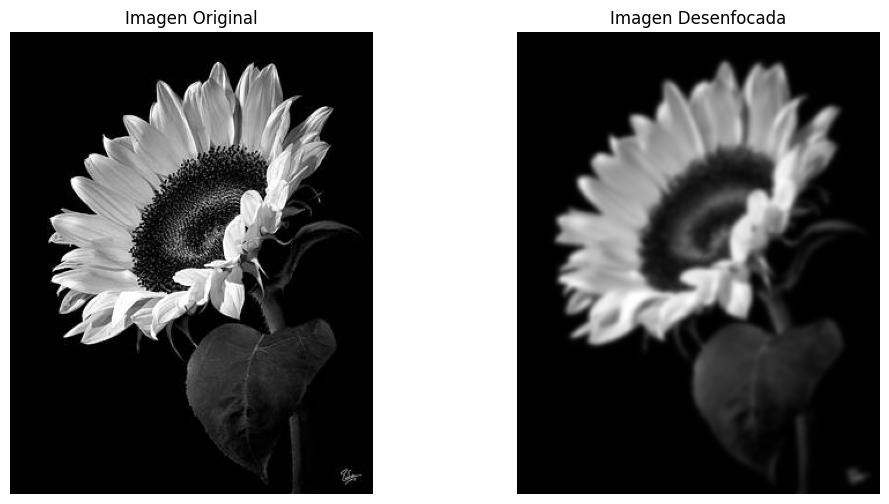

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def aplicar_desenfoque_gaussiano(imagen, sigma=2):
    """
    Aplica un desenfoque gaussiano a la imagen dada.
    
    Parámetros:
    imagen: np.array - imagen en escala de grises.
    sigma: float - desviación estándar del filtro gaussiano.
    
    Retorna:
    np.array - imagen desenfocada.
    """
    return gaussian_filter(imagen, sigma=sigma)

# Ejemplo de cómo usar la función
imagen = plt.imread('image1.jpg')
imagen_gris = np.mean(imagen, axis=2)  # Convertir a escala de grises

# Aplicar desenfoque gaussiano
imagen_desenfocada = aplicar_desenfoque_gaussiano(imagen_gris, sigma=2)

# Mostrar la imagen original y la imagen desenfocada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_desenfocada, cmap='gray')
plt.title('Imagen Desenfocada')
plt.axis('off')

plt.show()

# Operador lineal que simula la multiplicación por A
def operador_A(x, sigma, shape):
    # Primero, remodelamos x para que tenga la forma de la imagen
    imagen = x.reshape(shape)
    # Luego, aplicamos el desenfoque gaussiano
    imagen_desenfocada = aplicar_desenfoque_gaussiano(imagen, sigma)
    # Finalmente, aplanamos la imagen desenfocada para obtener el resultado
    return imagen_desenfocada.flatten()

# Ejemplo de uso
A = crear_matriz_degradacion(imagen_gris.shape, bloque_tam)
b = imagen_desenfocada.flatten()

# Aplicar el gradiente conjugado
x0 = np.zeros_like(b)  # Inicialización
tol = 1e-6  # Tolerancia
solucion, iteraciones = grad_conj(A, b, x0, tol)

# Reconstruir la imagen a partir de la solución
imagen_restaurada = solucion.reshape(imagen_gris.shape)

# Mostrar la imagen restaurada
plt.imshow(imagen_restaurada, cmap='gray')
plt.title('Imagen Restaurada')
plt.show()



Alto: 103 Ancho: 147


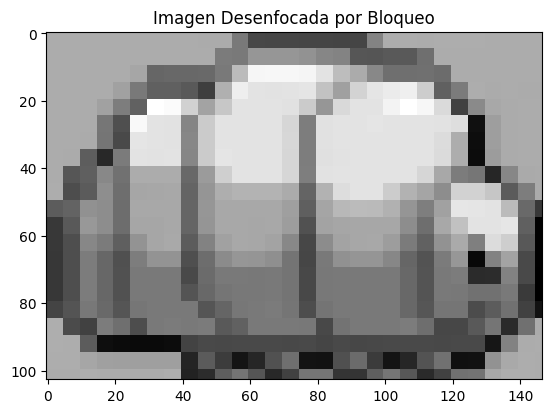

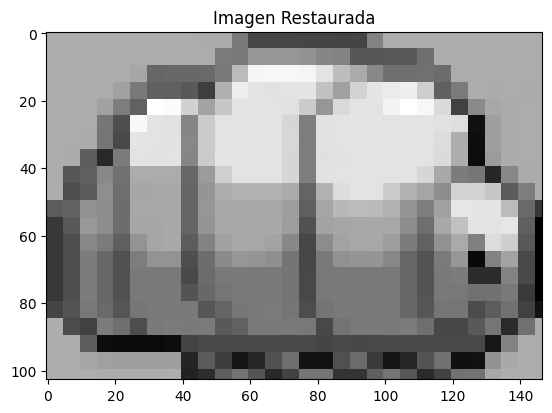

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def bloque_promedio(imagen, bloque_tam):
    """
    Aplica un desenfoque por bloque a la imagen.
    bloque_tam: Tamaño del bloque.
    """
    img_desenfocada = imagen.copy()
    for i in range(0, imagen.shape[0], bloque_tam):
        for j in range(0, imagen.shape[1], bloque_tam):
            bloque = imagen[i:i+bloque_tam, j:j+bloque_tam]
            promedio = np.mean(bloque)
            img_desenfocada[i:i+bloque_tam, j:j+bloque_tam] = promedio
    return img_desenfocada

# Cargar y preparar la imagen
imagen = plt.imread('img3.jpg')
imagen_gris = np.mean(imagen, axis=2)  # Convertir a escala de grises
alto, ancho = imagen.shape[:2]
print("Alto:", alto, "Ancho:", ancho)

# Aplicar desenfoque por bloque
tam_bloque = 5  # Puedes ajustar esto
imagen_desenfocada = bloque_promedio(imagen_gris, tam_bloque)

# Mostrar la imagen desenfocada
plt.imshow(imagen_desenfocada, cmap='gray')
plt.title('Imagen Desenfocada por Bloqueo')
plt.show()


# ----------------------------------------------------------------------------------

def crear_matriz_degradacion(tam_imagen, bloque_tam):
    # Para simplificar, consideramos bloques de tamaño 1x1 (matriz identidad)
    n = tam_imagen[0] * tam_imagen[1]  # Número total de píxeles
    A = np.identity(n)
    # Aquí se extendería el enfoque para bloques más grandes
    return A

# Ejemplo de uso
A = crear_matriz_degradacion(imagen_gris.shape, bloque_tam)
b = imagen_desenfocada.flatten()

# Aplicar el gradiente conjugado
x0 = np.zeros_like(b)  # Inicialización
tol = 1e-6  # Tolerancia
solucion, iteraciones = grad_conj(A, b, x0, tol)

# Reconstruir la imagen a partir de la solución
imagen_restaurada = solucion.reshape(imagen_gris.shape)

# Mostrar la imagen restaurada
plt.imshow(imagen_restaurada, cmap='gray')
plt.title('Imagen Restaurada')
plt.show()